In [1]:
# import
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
%matplotlib notebook

# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
# init_notebook_mode(connected=True)
# cf.go_offline()

data = pd.read_csv('../data/Table_alpha_Data.txt', header=0, dtype=np.float64)
X, y = data.values[:,:2], data.values[:,2]


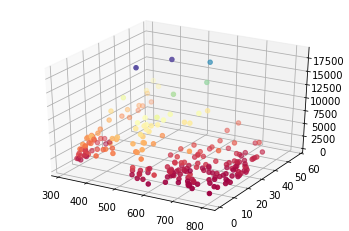

In [2]:
# plotting
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,1][::10], X[:,0][::10], y[::10], c=y[::10], cmap='Spectral')

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
i =  0
i =  1


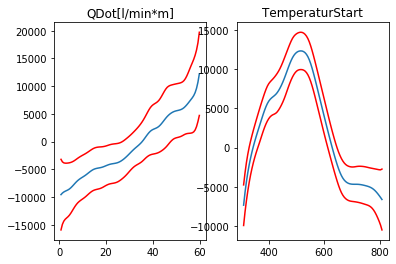

In [3]:
# pyGAM
from pygam import LinearGAM, s, te, PoissonGAM, f, GAM

gam = GAM(s(0, constraints="monotonic_inc") + s(1) + te(1,0))
gam.gridsearch(X,y)

titles = ['QDot[l/min*m]', 'TemperaturStart']
fig, axs = plt.subplots(1,len(titles));

# plot partial dependences
for i, ax in enumerate(axs):
    print("i = ", i)
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r')
    ax.set_title(titles[i])

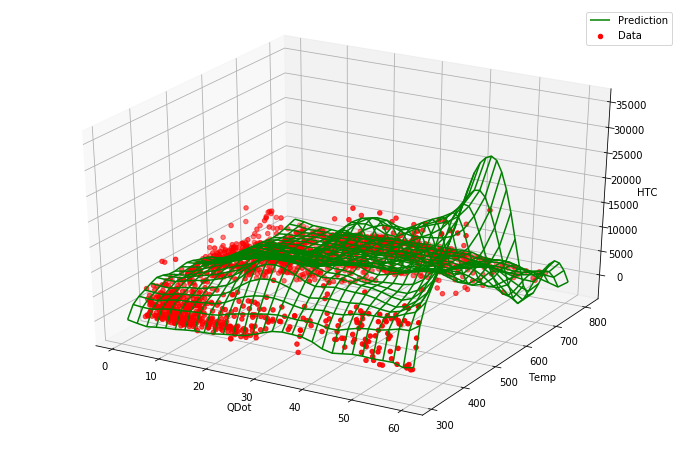

In [4]:
# plot meshs
x1 = np.linspace(data.min()[0], data.max()[0], 30)
x2 = np.linspace(data.min()[1], data.max()[1], 30)

XX, YY = np.meshgrid(x1, x2)
Z = gam.predict(np.array([XX.flatten(), YY.flatten()]).T).reshape(30,30)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection="3d")
ax.plot_wireframe(XX, YY, Z, color='green', label="Prediction")
ax.scatter(X[:,0], X[:,1], y, c='r', label="Data")
ax.set_xlabel('QDot')
ax.set_ylabel('Temp')
ax.set_zlabel('HTC')
ax.legend()


In [197]:
gam.summary()


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     88.0299
Link Function:                     IdentityLink Log Likelihood:                                -35049.8415
Number of Samples:                         2241 AIC:                                            70277.7428
                                                AICc:                                           70285.1956
                                                GCV:                                          2661456.6887
                                                Scale:                                          2473957.73
                                                Pseudo R-Squared:                                   0.7629
Feature Function                  Lam

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

<IPython.core.display.Javascript object>

In [161]:
print(f"Z shape: ", Z.min())
print(f"Shape XX[0]: {XX[0].shape}")

data.min()[0]

Z shape:  1079167.486099395
Shape XX[0]: (2,)


0.80211755006515